# Średnie

In [3]:
# By zaimportować moduły z głównego folderu
%cd ..

/Users/nerooc/Documents/Studia/device-downtime-detection


In [7]:
import import_ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_preprocessing import split_working_faulty_blocks

plt.rcParams["figure.figsize"] = (20,6)

In [5]:
working_blocks_df, faulty_blocks_df = split_working_faulty_blocks()

working_blocks = working_blocks_df.values.tolist()
faulty_blocks = faulty_blocks_df.values.tolist()

## Bloki działające

### Podstawowe statystyki dla bloku działającego

In [5]:
# Średnie dla wszystkich dostępnych bloków działających
print('\nŚrednie dla wszystkich dostępnych bloków działających: \n')
working_blocks_means = np.mean(working_blocks, axis=0)
print(working_blocks_means)

# Średnia dla jednego bloku działającego
print('\nŚrednia dla wartości z jednego bloku działającego: \n')
print(np.mean(working_blocks[0], axis=0))


Średnie dla wszystkich dostępnych bloków działających: 

[0.93289994 0.67716575 0.94900159 0.71989621 0.46782493 0.66716711
 0.78954673 0.90357706 0.7108166 ]

Średnia dla wartości z jednego bloku działającego: 

0.8184809960318495


### Przedstawienie średnich dla poszczególnych wartości z bloku działającego na wykresach

In [6]:
def Extract(lst, idx):
    return [item[idx] for item in lst]

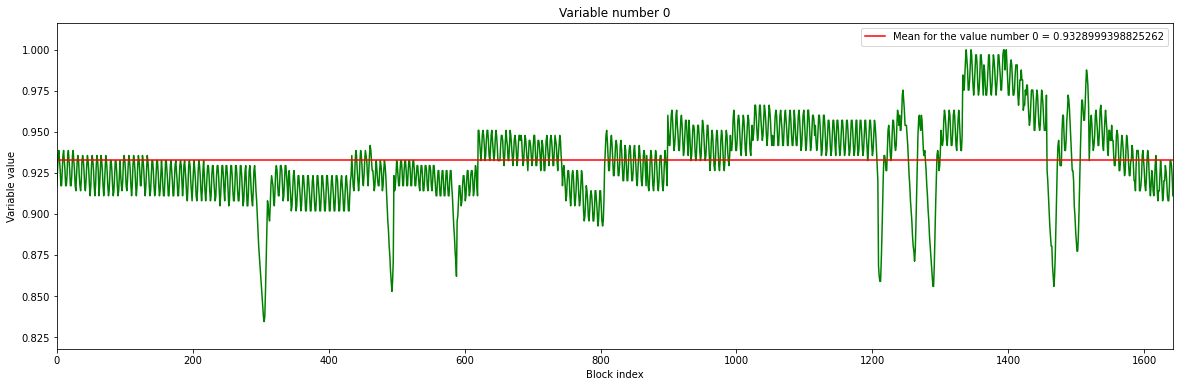

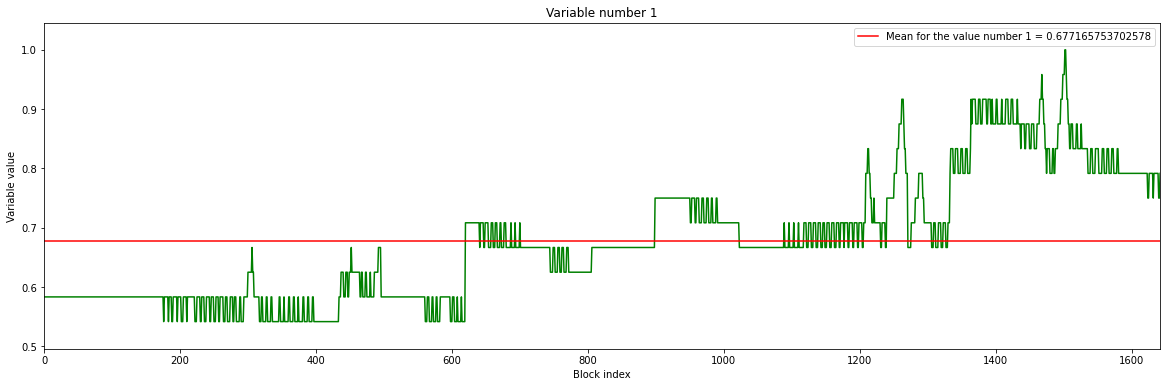

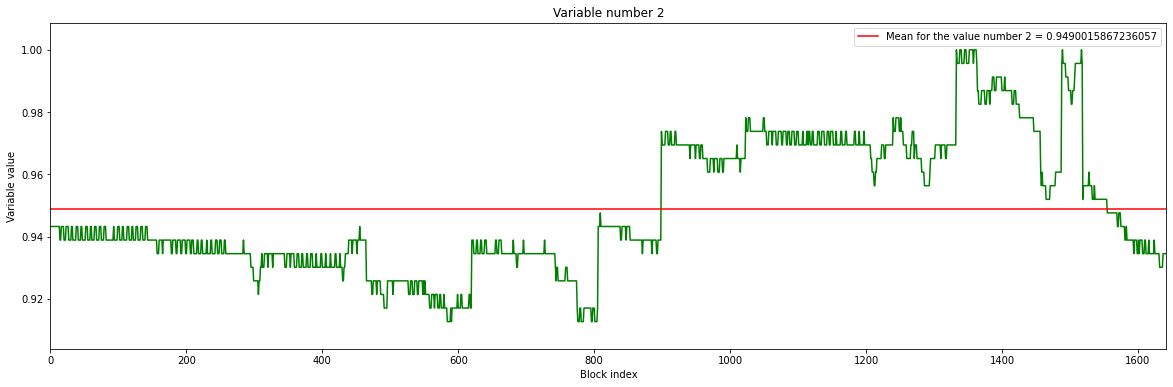

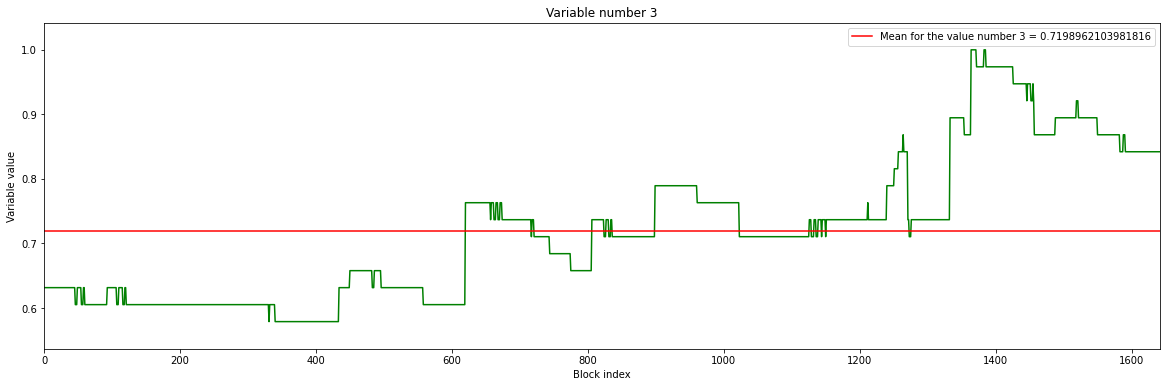

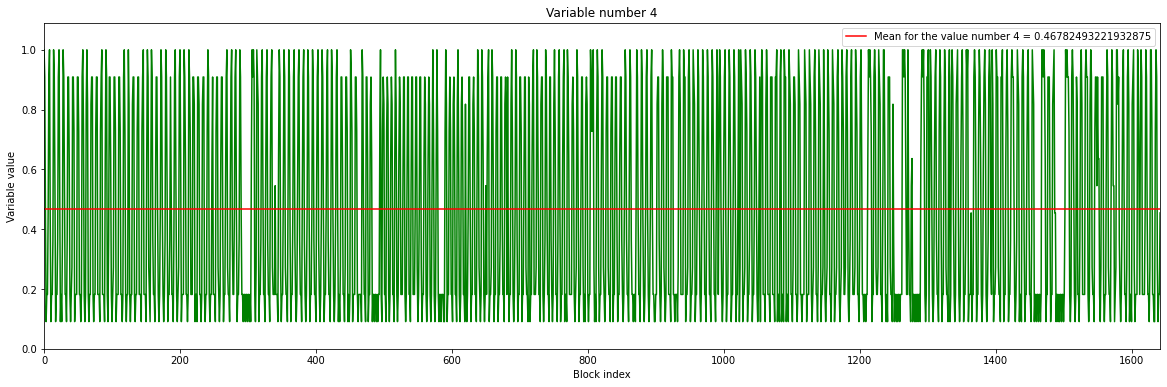

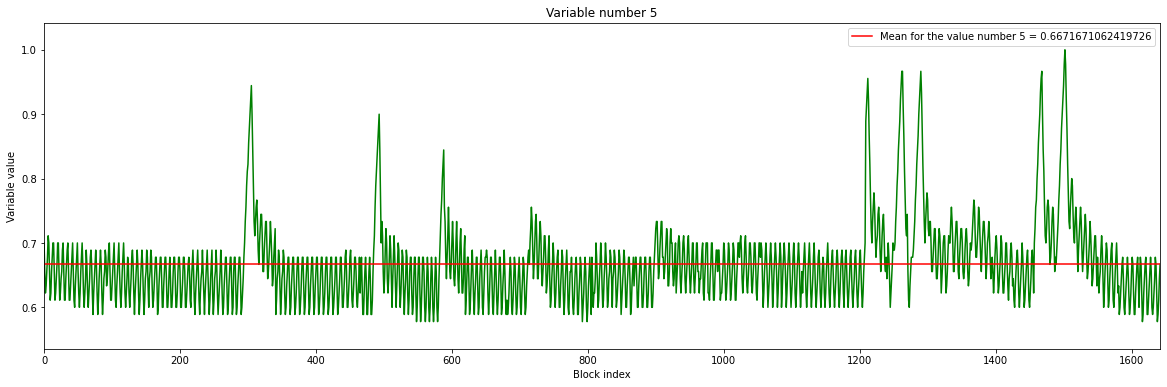

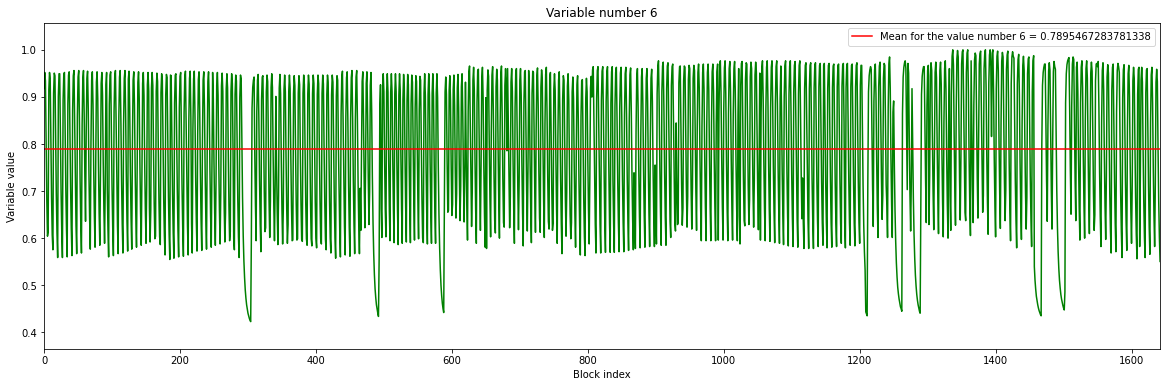

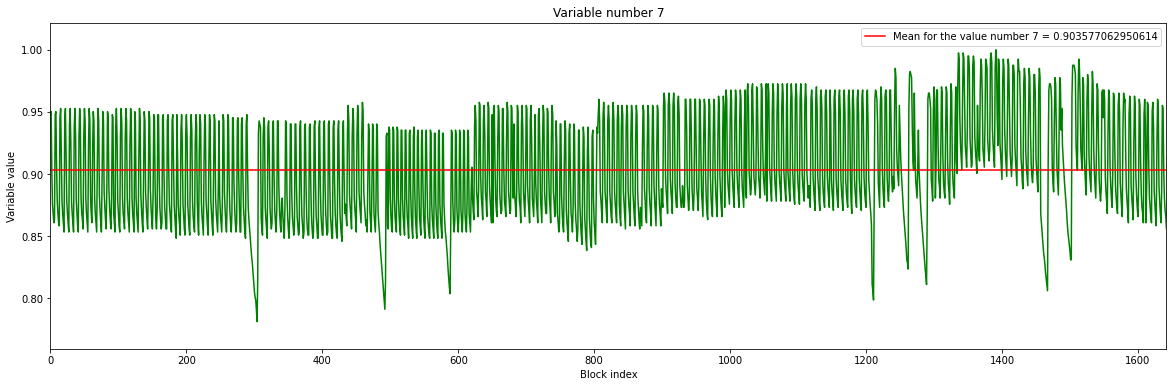

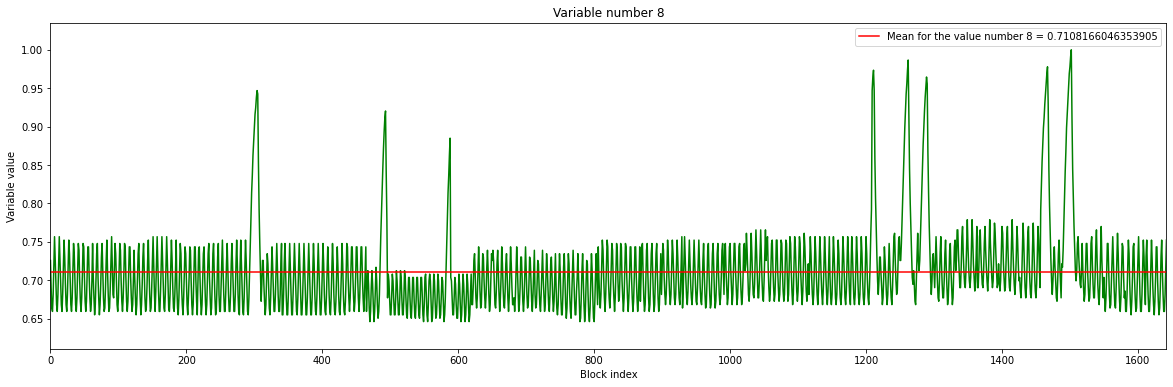

In [9]:
for idx in range(9):
    working_blocks_single_value_array = Extract(working_blocks, idx)

    plt.plot(working_blocks_single_value_array, color='green')
    plt.title("Variable number {0}".format(idx))
    plt.axhline(y=working_blocks_means[idx], color='r', linestyle='-', label='Mean for the value number {0} = {1}'.format(idx, working_blocks_means[idx]))
    plt.xlabel('Block index')
    plt.ylabel('Variable value')
    plt.margins(0, 0.1)
    plt.legend()
    plt.show()

### Wykres średnich z każdego bloku działającego

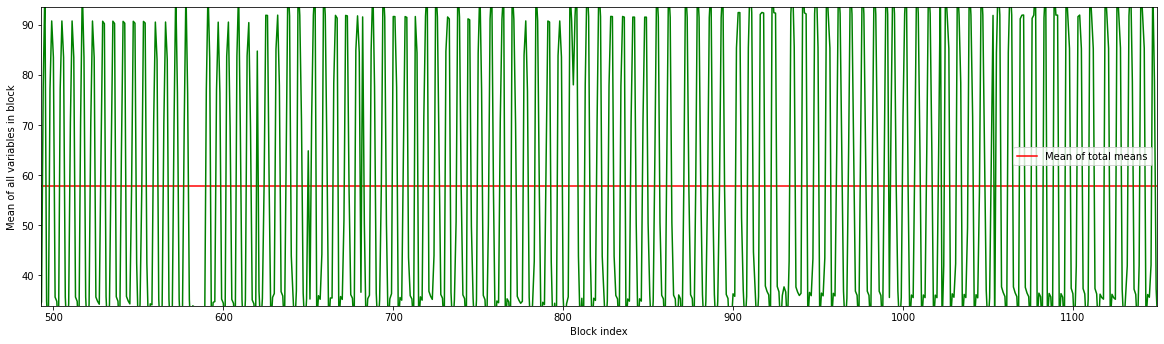

In [85]:
working_blocks_total_means = []

for block in working_blocks:
    working_blocks_total_means.append(np.mean(block))

plt.margins(x=-0.3, y=-0.1)
plt.axhline(y=np.mean(working_blocks_total_means), color='r', linestyle='-', label='Mean of total means')
plt.xlabel('Block index')
plt.ylabel('Mean of all variables in block')
plt.legend()
plt.plot(working_blocks_total_means, color='green')

## Bloki awaryjne

In [79]:
# Średnie dla wszystkich dostępnych bloków niedziałających
print('\nŚrednie dla wszystkich dostępnych bloków awaryjnych: \n')
faulty_blocks_means = np.mean(faulty_blocks, axis=0)
print(faulty_blocks_means)

# Średnia dla jednego bloku niedziałającego
print('\nŚrednia dla wartości z jednego bloku awaryjnego: \n')
print(np.mean(faulty_blocks[0], axis=0))


Średnie dla wszystkich dostępnych bloków awaryjnych: 

[ 31.10340502  18.65949821  21.43936679  32.76224612 322.83154122
   5.83960573  59.55179211  38.60860215  16.28715651]

Średnia dla wartości z jednego bloku awaryjnego: 

37.1888888888889


### Przedstawienie średnich dla poszczególnych wartości z bloku awaryjnego na wykresach

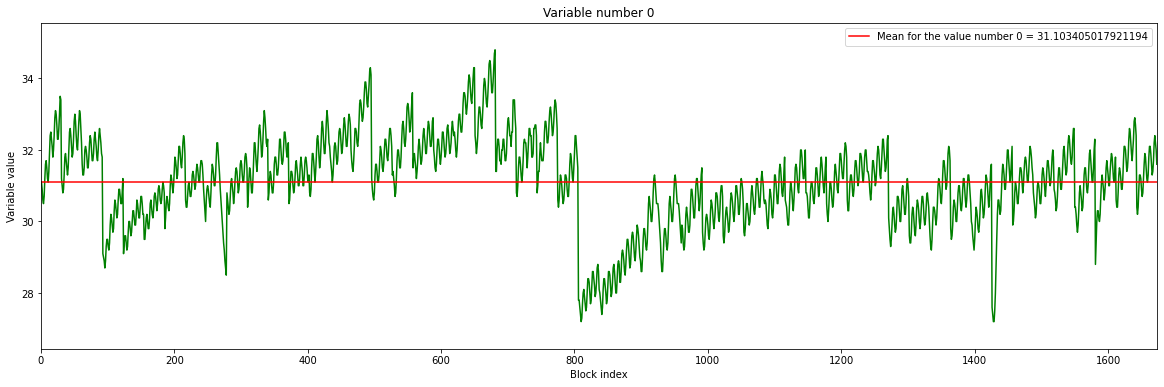

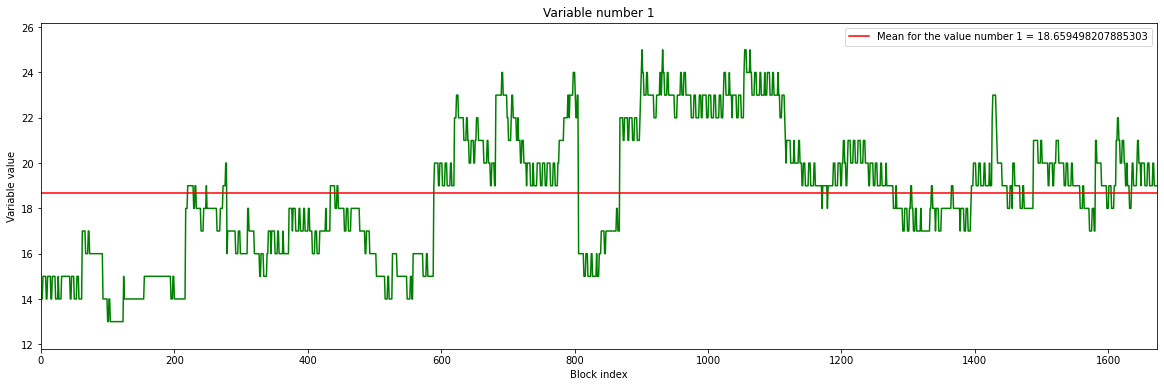

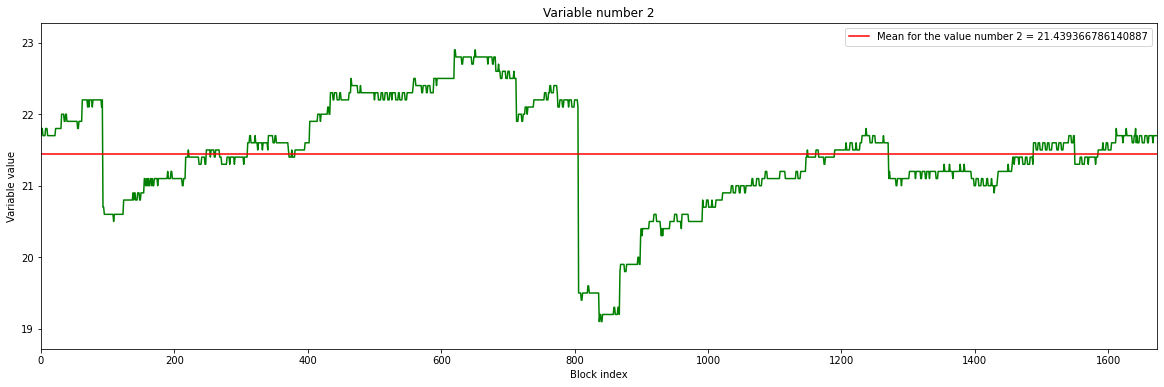

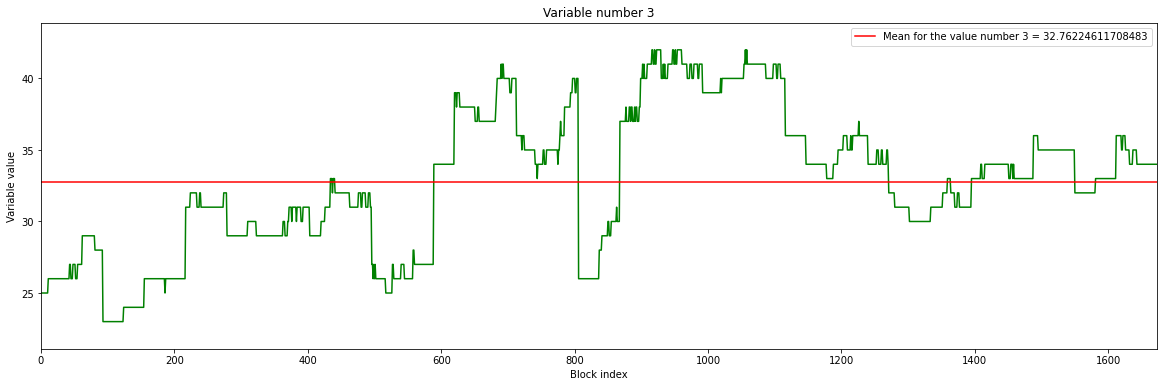

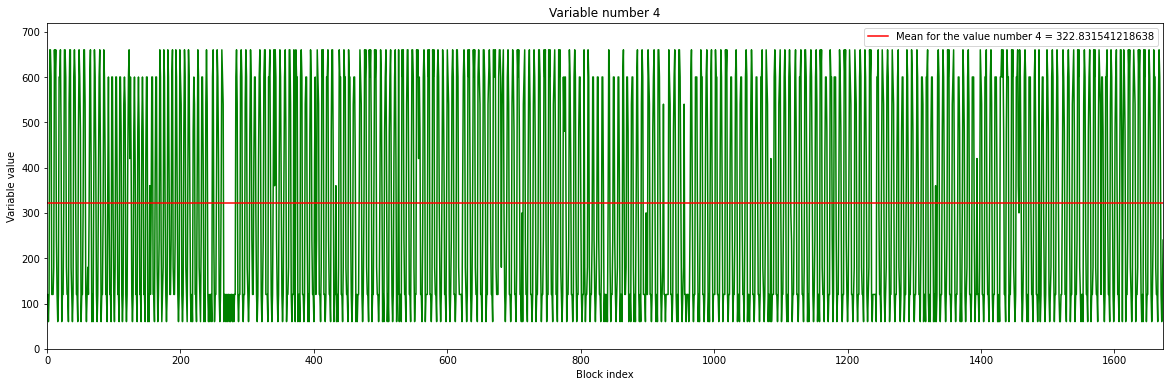

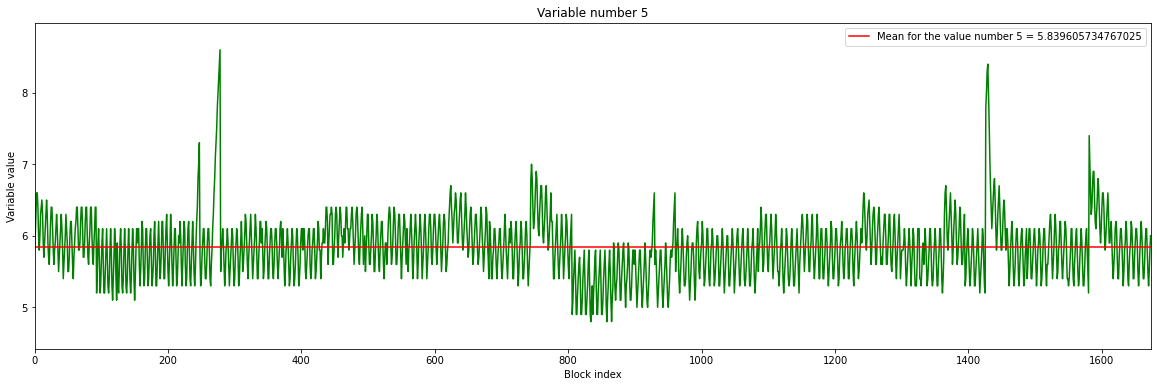

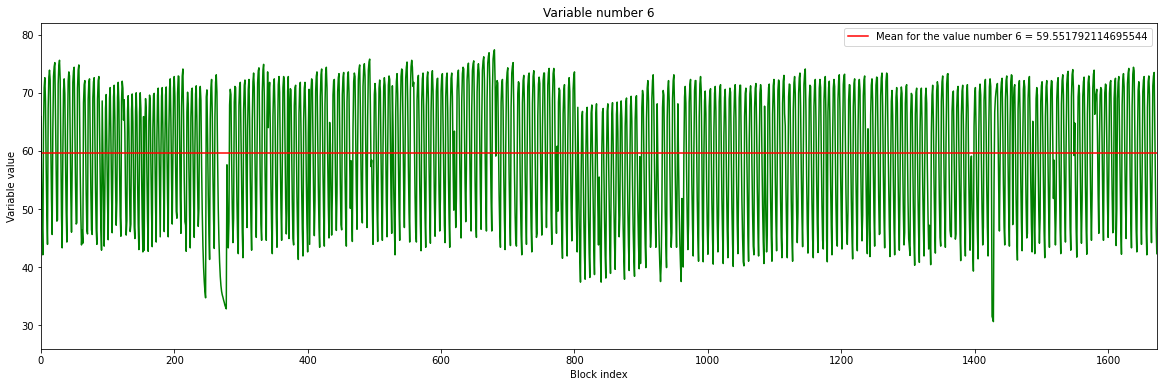

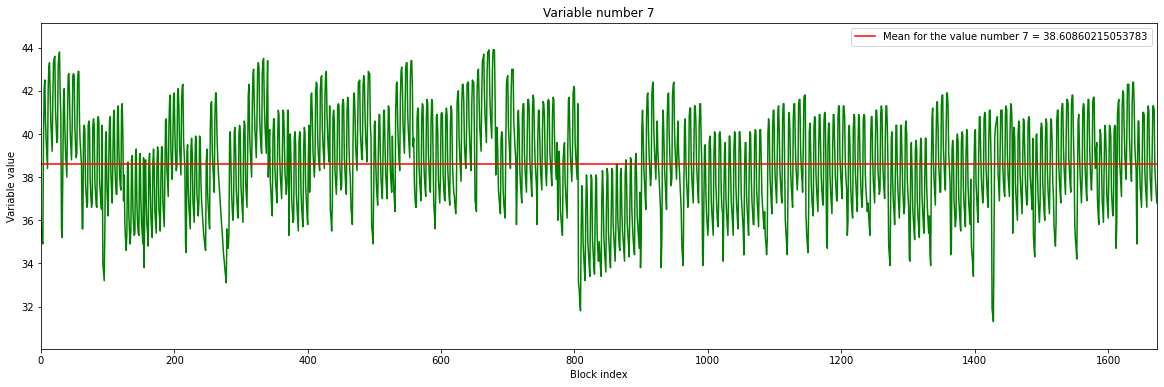

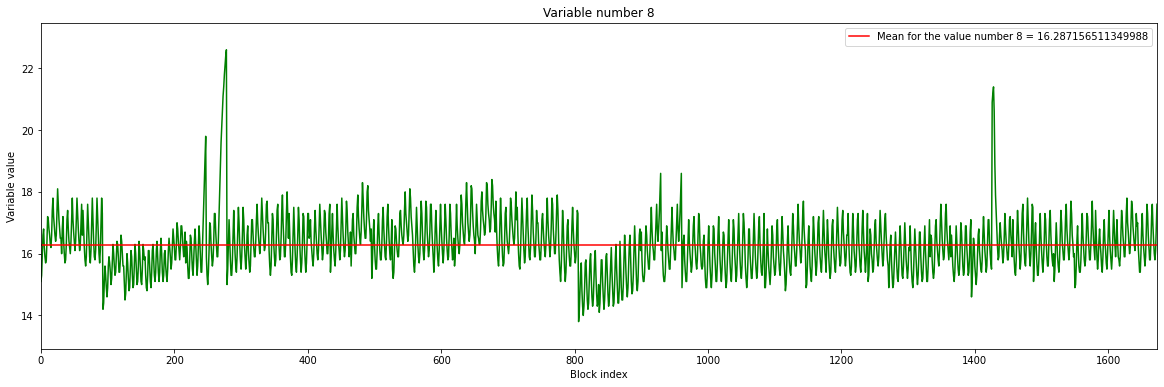

In [102]:
for idx in range(9):
    faulty_blocks_single_value_array = Extract(faulty_blocks, idx)

    plt.plot(faulty_blocks_single_value_array, color='green')
    plt.title("Variable number {0}".format(idx))
    plt.axhline(y=faulty_blocks_means[idx], color='r', linestyle='-', label='Mean for the value number {0} = {1}'.format(idx, faulty_blocks_means[idx]))
    plt.xlabel('Block index')
    plt.ylabel('Variable value')
    plt.margins(0, 0.1)
    plt.legend()
    plt.show()

### Wykres średnich z każdego bloku awaryjnego

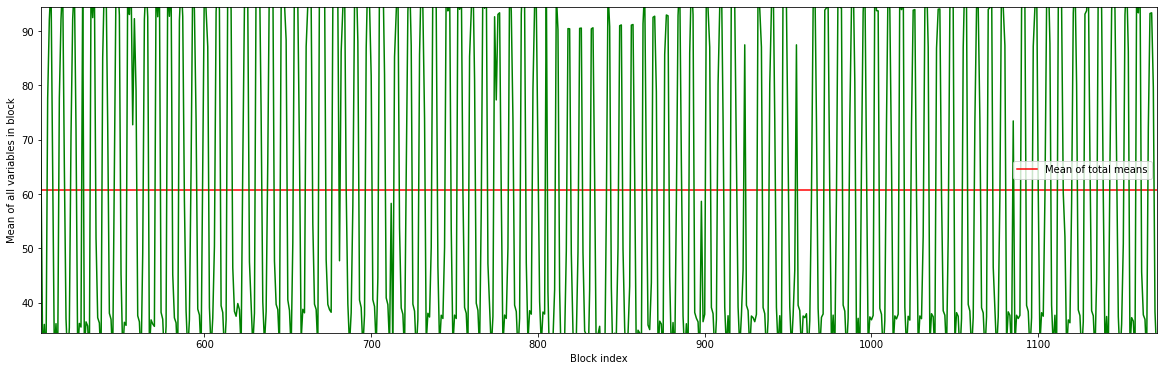

In [103]:
faulty_blocks_total_means = []

for block in faulty_blocks:
    faulty_blocks_total_means.append(np.mean(block))

plt.margins(x=-0.3, y=-0.1)
plt.axhline(y=np.mean(faulty_blocks_total_means), color='r', linestyle='-', label='Mean of total means')
plt.xlabel('Block index')
plt.ylabel('Mean of all variables in block')
plt.legend()
plt.plot(faulty_blocks_total_means, color='green')

In [18]:
def display_means_and_points(ndf: pd.DataFrame, fdf: pd.DataFrame):
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    ndf_mean = ndf[0, 1, 2, 3, 4, 5, 6, 7, 8].mean()
    fdf_mean = fdf[0, 1, 2, 3, 4, 5, 6, 7, 8].mean()

    for index, param in enumerate(labels):
        figure, axis = plt.subplots(1, 3, figsize=(24, 10), sharex=True, sharey=True)
        axis[0].set_title("All " + str(param) + "values and its mean for normal data")
        axis[0].scatter(ndf.iloc[:, 0], ndf.iloc[:, index + 1], marker='o')
        axis[0].plot(ndf_mean.index, ndf_mean[param], linewidth=4, color='red')
        axis[1].set_title("All " + str(param) + "values and its mean for fault data")
        axis[1].scatter(fdf.iloc[:, 0], fdf.iloc[:, index + 1], marker='o')
        axis[1].plot(fdf_mean.index, fdf_mean[param], linewidth=4, color='red')
        axis[2].set_title("Men values of " + str(param) + "for fault (green) and normal (purple) data")
        axis[2].plot(ndf_mean.index, ndf_mean[param], linewidth=3, color='purple')
        axis[2].plot(fdf_mean.index, fdf_mean[param], linewidth=3, color='green')

In [23]:
working_blocks_df[0]

# display_means_and_points(working_blocks_df, faulty_blocks_df)


0       29.9
1       30.2
2       30.5
3       30.6
4       30.4
        ... 
1638    30.4
1639    30.4
1640    30.3
1641    30.1
1642    29.7
Name: 0, Length: 1643, dtype: float64